Activity Title : Early Detection of Epilepsy 

Step 1: Downloading the Dataset:
use the following link https://neureka-challenge.com/ , you will find all the information in order to understand how to download the dataset.        

Step 2: Installing MNE-Python

MNE-Python is an open-source Python module for processing, analysis, and visualization of functional neuroimaging data (such as EEG signals). 
use the following link to install:
https://mne.tools/dev/install/mne_python.html#installing-python

Step 3: Preparing the dataset 

When you downloading the dataset, you have to looking for the following:
    
1. The EDF files (training & validation):

The edf folder that contain two sub-folders( train for training dataset and dev for validation dataset). 

2. The Labels files:

The _DOCS folder that contain tow text files ( ref_train.txt that including the labels and the event's time for each edf file for training dataset and ref_dev.txt that including the labels and the event's time for each edf file for validation dataset).


In [1]:
## Loading the Labels' files

import pandas as pd
#Training set
dir_train_label='D:/data/_DOCS/ref_train.txt'
train_label = pd.read_csv(dir_train_label, sep=" ", header=None)
train_label.columns = ['edf_Name', 'Start_ts_evnt','End_ts_evnt','Label','Conf']

In [2]:
train_label.head()

,edf_Name,Start_ts_evnt,End_ts_evnt,Label,Conf
0,00000077_s003_t000,0.0,1205.0,bckg,1.0
1,00000254_s005_t000,0.0,1442.0,bckg,1.0
2,00000254_s006_t001,0.0,1197.0,bckg,1.0
3,00000254_s007_t000,0.0,1244.0,bckg,1.0
4,00000272_s007_t000,0.0,194.0,bckg,1.0


In [3]:
train_label.shape

(9337, 5)

In [4]:
#Validation set
dir_valid_label='D:/data/_DOCS/ref_dev.txt'
valid_label = pd.read_csv(dir_valid_label, sep=" ", header=None)
valid_label.columns = ['edf_Name', 'Start_ts_evnt','End_ts_evnt','Label','Conf']

In [5]:
valid_label.head()

,edf_Name,Start_ts_evnt,End_ts_evnt,Label,Conf
0,00000258_s002_t000,0.0,20.0000,bckg,1.0
1,00000258_s002_t002,0.0,272.0000,bckg,1.0
2,00000258_s003_t000,0.0,234.0000,bckg,1.0
3,00000258_s003_t001,0.0,224.0000,bckg,1.0
4,00000258_s003_t002,0.0,8.8275,bckg,1.0


In [6]:
valid_label.shape

(2359, 5)

In [7]:
## Create the list that including all the edf files for training and validation datasets
import numpy as np
train_edf = train_label["edf_Name"]
valid_edf = valid_label["edf_Name"]

list_train_edf = []
list_validation_edf = []
i=0
while i < len(train_edf):
    list_train_edf.append(train_edf.iloc[i])
    i+=1

# TODO: complete for the validation
j = 0
while j < len(valid_edf):
    list_validation_edf.append(valid_edf.iloc[j])
    j+=1
# or list_validation_edf = list(valid_edf)

In [8]:
len(list_train_edf)

9337

In [9]:
len(list_validation_edf)

2359

In [10]:
list_train_edf

['00000077_s003_t000',
 '00000254_s005_t000',
 '00000254_s006_t001',
 '00000254_s007_t000',
 '00000272_s007_t000',
 '00000272_s007_t001',
 '00000272_s007_t002',
 '00000272_s007_t003',
 '00000272_s007_t004',
 '00000272_s007_t005',
 '00000272_s008_t000',
 '00000272_s008_t001',
 '00000272_s008_t002',
 '00000272_s008_t003',
 '00000272_s008_t004',
 '00000272_s008_t005',
 '00000458_s005_t000',
 '00000458_s011_t000',
 '00000458_s011_t001',
 '00000458_s011_t002',
 '00000458_s011_t003',
 '00000458_s011_t004',
 '00000458_s011_t005',
 '00000458_s011_t006',
 '00000458_s011_t007',
 '00000458_s011_t008',
 '00000458_s012_t000',
 '00000458_s012_t001',
 '00000458_s012_t002',
 '00000458_s012_t003',
 '00000458_s012_t004',
 '00000458_s012_t005',
 '00000458_s012_t006',
 '00000458_s012_t007',
 '00000458_s012_t009',
 '00000492_s003_t000',
 '00000492_s003_t000',
 '00000492_s003_t000',
 '00000492_s003_t001',
 '00000492_s003_t001',
 '00000492_s003_t001',
 '00000492_s003_t002',
 '00000492_s003_t002',
 '00000492_

In [11]:
# Create the selected channels' names list 
tcp_ar = ['EEG FP1-REF', 'EEG FP2-REF', 'EEG F3-REF', 'EEG F4-REF', 'EEG C3-REF', 'EEG C4-REF', 'EEG P3-REF', 'EEG P4-REF', 'EEG O1-REF', 'EEG O2-REF', 'EEG F8-REF', 'EEG T3-REF', 'EEG T4-REF', 'EEG T5-REF', 'EEG T6-REF', 'EEG FZ-REF', 'EEG CZ-REF']
tcp_le = ['EEG FP1-LE', 'EEG FP2-LE', 'EEG F3-LE', 'EEG F4-LE', 'EEG C3-LE', 'EEG C4-LE', 'EEG P3-LE', 'EEG P4-LE', 'EEG O1-LE', 'EEG O2-LE', 'EEG F7-LE', 'EEG F8-LE', 'EEG T3-LE', 'EEG T4-LE', 'EEG T5-LE', 'EEG T6-LE',  'EEG CZ-LE']
tcp_ar_a = ['EEG FP1-REF', 'EEG FP2-REF', 'EEG F3-REF', 'EEG F4-REF', 'EEG C3-REF', 'EEG C4-REF', 'EEG P3-REF', 'EEG P4-REF', 'EEG O1-REF', 'EEG O2-REF', 'EEG F7-REF', 'EEG F8-REF', 'EEG T3-REF', 'EEG T4-REF', 'EEG T5-REF', 'EEG T6-REF', 'EEG CZ-REF']
print(len(tcp_ar))
print(len(tcp_le))
print(len(tcp_ar_a))

17
17
17


In [12]:
# this function helps to find the file by searching through the given path

import os, fnmatch

def find(pattern, path):
    result = []
    for root, dirs, files in os.walk(path):
        for name in files:
            if fnmatch.fnmatch(name, pattern):
                result.append(os.path.join(root, name))
    return result

In [26]:
# create the list of edf files path ( train/valid) by using the find function above
#pathy = " " # insert the path of two datasets ( /train & /edv )
pathy = 'D:\\EDF_TRAINING\\'
edf_train_path = []
i=0
while i < len(list_train_edf[1:50]):
    edf_train_path.append(find(list_train_edf[i]+'.edf',pathy))
    i+=1
    
## TODO: complete the edf_valid_path
path_val = 'D:\\DATA\\EDF\\DEV\\'
edf_valid_path = []
x =0
while x < len(list_validation_edf[1:50]):
    edf_valid_path.append(find(list_validation_edf[x]+'.edf',path_val))
    x += 1

In [57]:
edf_train_path[1:5]

[['D:\\EDF_TRAINING\\ar\\00000254_s005_t000.edf'],
 ['D:\\EDF_TRAINING\\ar\\00000254_s006_t001.edf'],
 ['D:\\EDF_TRAINING\\ar\\00000254_s007_t000.edf'],
 ['D:\\EDF_TRAINING\\ar\\00000272_s007_t000.edf']]

In [59]:
#edf_valid_path[1:5]

In [58]:
## Load and read the edf file by using mne module 

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mne
from mne.io import concatenate_raws, read_raw_edf

%matplotlib inline 


In [36]:
## TODO: Create function for reading the edf file, resampling it to 250Hz,...
## save to dataframe, using train_label & valid_label to extract the event time of each label
## (background, pre-seizure and seizure) and return the dic or dataframe with features and labels
'''
function: xyz
inputs: 
sFreq: sampling frequency = 250 Hz (variation)
low_freq,hi_freq for bandpass filter to extract the features frequency-based 
path = edf_train_path

'''
def xyz(path,sFreq = 250,low_freq = 0.5 ,hi_freq = 40):
   
    df_b = pd.DataFrame() # for background
    df_s = pd.DataFrame() # for seizure
    df_pz = pd.DataFrame() # for pre-seizure
    i = 0
    while i < len(path):
        #raw = mne.io.read_raw_edf(path[i],preload=True,)
        raw = mne.io.read_raw_edf((', '.join(path[i])),preload=True,)
        raw = raw.resample(sFreq, npad='auto')
        raw = raw.filter(low_freq, hi_freq, fir_design='firwin', skip_by_annotation='edge')
        raw = raw.to_data_frame() # save to dataframe
        
## TODO using train_label & valid_label to extract the event time of each label
## (background, pre-seizure and seizure) and return the dic or dataframe with features and labels
        
        if 'EEG FP1-le' in raw.columns:
            j=0 
            feat_b = []
            feat_s = []
            feat_pz= []
            while j < len(tcp_le):
                feat = raw[tcp_le[j]].tolist()
                if train_label['Label'][i] == 'bckg':
                    feat1 = feat[slice(int(train_label['Start_ts_evnt'][i].item())+10*250 , 15*250)]
                    for x in feat1:
                        feat_b.append(x)
                        
                elif train_label['Label'][i] == 'seiz':
                    feat2 = feat[slice(int(train_label['Start_ts_evnt'][i].item()),int(train_label['Start_ts_evnt'][i].item())+5*250)]
                    for x in feat2:
                        feat_s.append(x)
                    
                    feat3 = feat[slice(int(train_label['Start_ts_evnt'][i].item())-5*250,-int(train_label['Start_ts_evnt'][i].item()))]
                    for x in feat3:
                        feat_pz.append(x)
                j+=1
                                 
            ft_b = pd.DataFrame([feat_b])
            df_b = df_b.append(ft_b)
            ft_s = pd.DataFrame([feat_s])
            df_s = df_s.append(ft_s)
            ft_pz = pd.DataFrame([feat_pz])
            df_pz = df_pz.append(ft_pz)
            
        else:
            
            j=0 
            feat_b = []
            feat_s = []
            feat_pz= []
            while j < len(tcp_ar):
                feat = raw[tcp_ar[j]].tolist()
                if train_label['Label'][i] == 'bckg':
                    feat1 = feat[slice(int(train_label['Start_ts_evnt'][i].item())+10*250 , 15*250)]
                    for x in feat1:
                        feat_b.append(x)
                        
                elif train_label['Label'][i] == 'seiz':
                    feat2 = feat[slice(int(train_label['Start_ts_evnt'][i].item()),int(train_label['Start_ts_evnt'][i].item())+6*250)]
                    for x in feat2:
                        feat_s.append(x)
                    
                    feat3 = feat[slice(int(train_label['Start_ts_evnt'][i].item())-5*250,-int(train_label['Start_ts_evnt'][i].item()))]
                    for x in feat3:
                        feat_pz.append(x)
                    
                j+=1
                                 
        ft_b = pd.DataFrame([feat_b])
        df_b = df_b.append(ft_b)
        ft_s = pd.DataFrame([feat_s])
        df_s = df_s.append(ft_s)
        ft_pz = pd.DataFrame([feat_pz])
        df_pz = df_pz.append(ft_pz)
        i+=1
    
        #df = feat_b.append(feat_s)
        #df.append(feat_pz)
    return df_b,df_s,df_pz

In [37]:
df_b,df_s,df_pz= xyz(edf_train_path)

Extracting EDF parameters from D:\EDF_TRAINING\ar\00000077_s003_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 301249  =      0.000 ...  1204.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (6.604 sec)

Extracting EDF parameters from D:\EDF_TRAINING\ar\00000254_s005_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360499  =      0.000 ...  1441.996 secs...
Fi

- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (6.604 sec)

Extracting EDF parameters from D:\EDF_TRAINING\ar\00000272_s008_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 72399  =      0.000 ...   180.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 H

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 153855  =      0.000 ...   600.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (6.604 sec)

Extracting EDF parameters from D:\EDF_TRAINING\ar\00000458_s011_t005.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5

- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (6.604 sec)

Extracting EDF parameters from D:\EDF_TRAINING\ar\00000458_s012_t006.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper tra

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 51599  =      0.000 ...   128.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (6.604 sec)

Extracting EDF parameters from D:\EDF_TRAINING\ar\00000492_s003_t002.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 51599  =      0.000 ...   128.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 

In [47]:
# Background Dataframe (features,target)
df_feat_b = df_b.dropna()
#df_feat_b['Label'] = 'bckg'
df_feat_b.shape

(40, 21250)

In [38]:
#(21250/250)/17

In [40]:
# Seizure Dataframe (features,target)
df_feat_s = df_s.dropna()
df_feat_s['Label'] = 'seiz'
df_feat_s.shape

C:\Users\shima\Downloads\New_Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(5, 25501)

In [41]:
# pre-Seizure Dataframe (features,target)
df_feat_pz = df_pz.dropna()
df_feat_pz['Label'] = 'pre-seiz'
df_feat_pz.shape

C:\Users\shima\Downloads\New_Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(1, 21047)

In [52]:
## TODO: Apllying PCA reduce Dim
from sklearn.decomposition import PCA

def apply_pca(n, features):
    
    pca = PCA(n_components = n) 
    x_new = pca.fit_transform(features)
        
    return pca, pd.DataFrame(x_new)

In [54]:
pca_obj, _ = apply_pca(40 ,df_feat_b)
print("Explained Variance:", list(pca_obj.explained_variance_ratio_))

Explained Variance: [0.974905018983398, 0.0078531492644193, 0.0022940922911413937, 0.0018492220827794864, 0.0017074524144539305, 0.0012978826648735388, 0.0009902353942835196, 0.000932377935021667, 0.0008472794214683226, 0.0007076249163155118, 0.0006754208068006376, 0.0006113357371777484, 0.0005310636567987632, 0.0004962507405056051, 0.00042343325162521846, 0.0003839821874893772, 0.0003517984028295933, 0.00030717976055831726, 0.00029376748559387165, 0.0002691740019634046, 0.0002651318095424951, 0.0002163575184952817, 0.00019552789281583504, 0.00019085821508167455, 0.00017122095833015504, 0.00015379883920961182, 0.00014005622822598, 0.00012410649546302184, 0.00011424106976579758, 0.00011068494216971825, 0.00010022048784704828, 9.35752867596357e-05, 8.280089050941696e-05, 7.724877417179541e-05, 7.370380461012176e-05, 6.0907377794463456e-05, 4.91056038443848e-05, 3.326711353472103e-05, 1.94452923313375e-05, 1.9226611394493776e-31]


Text(0, 0.5, 'cumulative variance')

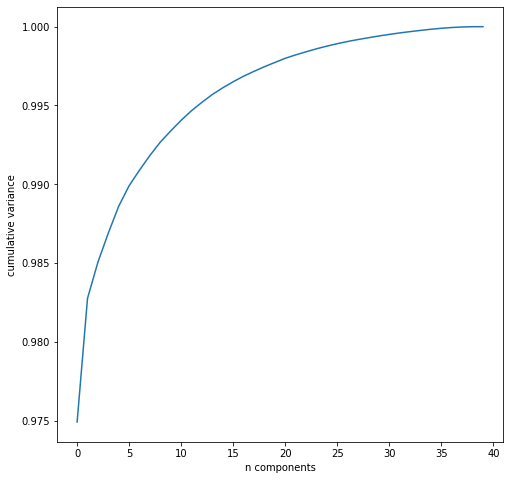

In [56]:
sum(pca_obj.explained_variance_ratio_)
plt.figure(figsize = (12, 8))

plt.plot(np.cumsum(pca_obj.explained_variance_ratio_))

plt.xlabel('n components')
plt.ylabel('cumulative variance')

In [66]:
## TODO: Scalling

#Try: Normalization
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)



#Try: Standardization

from sklearn.preprocessing import StandardScaler

# create scaler
scaler = StandardScaler()
# fit scaler on data
scaler.fit(data)
# apply transform
standardized = scaler.transform(data)


In [67]:
## TODO: train and validate your model using neural network
